# Multiple testing issues

*A Multiple Testing Correction Method for Genetic Association
Studies Using Correlated Single Nucleotide Polymorphisms*, Xiaoyi Gao, Joshua Starmer, and Eden R. Martin.

## Introduction

Bonferroni method is easy to compute, but too conservative in presence of LD. On the other hand, permutation-based correction can correctly account for LD among SNPs but are computationally intensive. The new method of the paper is comparable to permutation-based corrections. 

The correction assumes that the hypothesis tests are independent. Bonferroni correction is an approx of Šidák correction. The closely spaced SNPs often yield high correlation because of extensive LD. Thus the tests performed on each SNP are usually not independent. This limits the ability of Bonferroni method to control type I error. 

The idea would be to correctly infer the number of independent tests (effective number $M_{eff}$) and apply Bonferroni method. The new method presented estimates $M_{eff\_G}$ .

The first step in calculating $M_{eff}$ is to compute a correlation matrix, along with the corresponding eigenvalues, for the SNP loci, but we need information on haplotypes. Composite LD correlation can capture the relationship among SNPs comparable to those of gametic LD without requiring HWE. The method use CLD to create the correlation matrix and $M_{eff\_g}$ to calculate the effective number of independant tests. 

CLD correlation can be calculated in R using `cor()` function when SNP genotypes are numerically coded as 2 (WT allele homozygotes), 1 (WT allele heterozygotes), 0 (variant-type allele homozygotes). 

1. Derive CLD correlation matrix from the SNP data set, using `cor()` in R (see Appendix)
1. Calculate eigenvalues
1. Infer $M_{eff\_G}$ through PCA to estimate to estimate the number of independant tests ($M_{eff\_G}$ is the number of PCs needed to explain 99.5% of the variation for SNP data). 
1. Apply Bonferroni correction formula to calculate the adjusted point-wise significance level as $\alpha_G = \alpha_e / M_{eff\_G}$

## Methods

We consider **only biallelic cases** for SNP markers. Each SNP marker has two alleles (*A*, *a*) and three genotypes (*AA*, *Aa*, *aa*). 

For example, take two SNPs A and B which both have two alleles (A, a, B, b). Note the alleles frequencies as $p_a$, $p_A$ and the genotype frequencies $P_{AA}$ , $P_{Aa}$ , $P_{aa}$ . $P_{AB}$ denotes the gametic frequency between SNPs A and B. Bonferroni and permutation-based point-wise correction threholds are denoted as $\alpha_B$ and $\alpha_P$ respectively. M is the total number of SNPs in the dataset. 

### Composite LD

$\Delta_{AB} = P_{AB} + P_{A/B} - 2p_A p_B = D_{AB} + D{A/B}$ , where $D_{AB} = P_{AB} - p_A p_B$ and $D_{A/B} = P_{A/B} - p_A p_B$.

The composite correlation is defined as 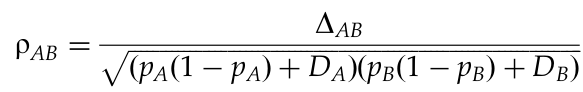

# [Hardy-Weinberg](https://en.wikipedia.org/wiki/Hardy%E2%80%93Weinberg_principle)

States that the alleles and genotype frequencies in a population will remain constant from generation to generation in the absence of other evolutionnary influences (genetic drift, mate choice, mutations, gene flow, ...).

Simple case: single locus, two alleles A and a with frequencies $f(A)$ and $f(a)$. The expected genotype frequencies under random mating are $f(AA)=p^2$, $f(aa)=q^2$, $f(Aa)=2pq$, with $p^2+2pq+q^2=1$ and $p+q=1$. 

In absence of selection, mutation, ..., allele frequencies p and q are constant between generations, so **equilibrium is reached**. Tests for Hardy-Weinberg genotype frequencies are used primarily to test for **population stratification** (and other forms of non-random mating).

## Assumptions

* organisms are diploid
* only sexual reproduction occurs
* generations are non-overlapping
* mating is random
* population size is infinitely large
* allele frequencies are equal in the sexes
* no migration, gene flow, admixture, mutation, selection

## Generalization - more than 2 alleles

Consider the alleles $A_1, ..., A_n$ described by the frequencies $p_1, ..., p_n$.<br/>
Then $f(A_iA_i)=p_i^2$ for all homozygotes, and $f(A_iA_j)=2p_iq_j$ for all heterozygotes (comes from the [multinomial expansion](https://en.wikipedia.org/wiki/Multinomial_theorem)).

## Applications

Two ways: either assume Hardy-Weinberg proportion and compute genotype frequencies, or the frequencies are known and can be tested for deviations that are statistically significant. 

# Association analyses

With plink and `--assoc` flag, a **genomic inflation factor** is calculated. See the [definition here](http://rstudio-pubs-static.s3.amazonaws.com/9743_8a5f7ba3aa724d4b8270c621fdf6d06e.html):

> The genomic inflation factor ($\lambda$) is defined as the ratio of the median of the empirically observed distribution of the test statistic to the expected median, thus quantifying the extent of the bulk inflation and the excess false positive rate. 

# Unsupervised learning

Aims to **find hidden structures in data**. This 

###### Types of problems

* Clustering
* Dimensional reduction (e.g. PCA)
* Outlier detection
* Novelty detection

###### Metrics

* Rand index
* v-measure
* silhouette score

## Clustering

###### Clustering techniques

* Soft parition: assign probability of the data belonging to each cluster (ex Mixture of Gaussians)
* Hard partition: each datapoint is assigned precise membership of one cluster
    * Partitional algorithms: start with random partitions and refine **iteratively** (ex K-means, spectral clustering). 
    * Hierarchical algorithms: bottom up agglomeration, split in top-down manner (ex agglomerative clustering)



# Principal component analysis

In the book *Applied Statistical Genetics with R*:
> 3.3.3 Identifying population substructure
> Population substructure can result in sprurious associations. There are two main approaches. First one: stratify the analysis by racial and ethnic groups and remove outlying individuals prior to testing for association (if corresponding strata are small).
Second approach: account for the population substructure in the analysis of association. 
> Application of principal component analysis (PCA) and multidimensional scaling (MDS) provide visual means to identify population substructure. The idea behind both approaches is to provide a low-dimensional representation of the data that captures the variability between individuals across SNPs. 

> The aim of PCA is to identify k (k<p) linear combinations of the data, commonly referred to as principal components, that capture the overall variability, where p is the number of variables, or SNPs in our settings.

From *Ten quick tips for effective dimensionality
reduction*:

Many statistical methods lack power when applied to high-dimensional data. Low-dimensional data representation that remove noise and retain the signal of interest can help understand hidden structure and patterns. Dimensionality reduction (DR) can be viewed as a method for latent feature extraction. 

Different methods apply to continuous, categorical, count, or distance data. Must consider the nature and the resolution of the data, as DR methods focus on either global or local structures. Usually, **linear methods** such as principal component analysis (PCA), correspondence analysis (CA), mutiple CA (MCA), or classical multidimensional scaling (cMDS) **preserve global structure**. Whereas non linear methods, such as kernel PCA, non-metric multidimensional scaling, Isomap, diffusion maps, and some neighbor embedding techniques are better are representing local interactions.

If observations have assigned labels, we want a representation that best separates into known categories so we use **supervised DR techniques**. 

## Preprocess continuous and count input data

For example, data centering is applied by default in most standard implementations. Also commonly apply scaling to obtain a variance of 1, this ensures an equal contribution from each variable. When working with genomic sequencing data, you need to address two issues before applying DR. 

1. Each sequencing sample has a different library size (sequencing depth). Must normalize each sample by dividing each measurement by a corresponding sample size factor, estimated using specialized methods (DESeq2, edgeR). 
2. The assay data exhibit a mean-variance trend in which features with higher means have higher variances. Can apply variance stabilization transformation (VST) to avoid bias toward the highly abundant features. 

In Pyhton, can perform PCA with **`sklearn.decomposition.PCA`**.

## SmartPCA

http://evomics.org/learning/population-and-speciation-genomics/2016-population-and-speciation-genomics/pca-exercise/



## Tip5: consciously decide on the numebr of dimensions to retain

If goal is data visualization, can display two or three axes at a time. But the first 2 or 3 PCs might explain an insufficient fraction of the variance. In some cases, the strongest signl is a confounding factor, and the variation of interest is captured by higher-order PCs. The optimal number of dimensions to keep depends largely on data itself. For DR methods based on spectral decompositions, such as PCA, you can use the distribution of eigenvalues to guide your choice. **In practice, people usually rely on "scree plots" and the elbow rule.**

A scree plot simply shows the eigenvalues corresponding to each of the axes, i.e. the proportion of variance explained by each axis (an axis is a principal component). You should look for a cutoff point, in which an eigenvalue drops significantly below the level of the one preceding it (the elbow point).  

## Tip 6: Apply the correct aspect ratio for visualizations

The DR plots should obey the **aspect ratio** consistent with the relative amount of information explained by the output axes displayed. In the case of PCA, each output dimension has a corresponding eigenvalue proportional to the amount of variance it explains. 

## Tip 7: understand the meaning of the new dimensions

Many linear DR methods, including PCA, provide a reduced representation o both the observations and the variables. Feature maps or correlation circles can be used to determine which original variables are associated with each other or with the newly generated output dimensions. The angles between the feature vectors or with the PC axes are informative: vectors at approximately 0° (180°) with each other indicate that the corresponding variables are closely, positively (negatively) related, where 90° angle indicate rough independance. 

Original variables' importance to the new dimensions can be visualized using contribution bar plots. A variable's contribution to a given new axis is computed as the ratio between its squared coordinate (in this axis) and the corresponding sum over all variables. 

## Tip 8: find the hidden signal

The aim is to uncover the hidden variables that can expose the structure of the data. The most frequently encountered latent patterns are **discrete clusters or continuous gradients**. 

## Tip 10: check the robustness of results

The eigenvectors (PCs) are not informative individually, and their loadings cannot be interpreted separately, because a very slight change in even one observation can lead to a completely different set of eigenvectors. In these cases, we say that these PCs are unstable. 

Another concern is a method's stability against outliers. In general, the observations that are far from the origin have more influence on the PCs than the ones close to the center. 

# Variable transformation

## Skewed distribution

Article: [Log-transformation and its implications for data analysis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4120293/)

The log-transformation is widely used in biomedial and psychosocial research to deal with skewed data. Often, results of standard statistical tests performed on log-transformed data are often not relevant for the original, non-transformed data. However, data transformations must be applied very cautiously.

# Coefficients of relationship

## Kinship coefficient

Find some references [here (pdf, slides)](https://genome.sph.umich.edu/w/images/1/1f/666.2017.12_-_Kinship_Coefficients.pdf), or [on wiki](https://en.wikipedia.org/wiki/Coefficient_of_relationship#Kinship_coefficient).

* Summarize gene similarity between pairs of individuals
* Can be used to study relationship between genetic similarity and phenotypic similarity across individuals

The kinship coefficient is a **measure of relatedness**, defined as the probability that a pair of randomly sampled homologous alleles are identical by descent. In other words, it's the probability that a randomly selected allele from an individual i, and an allele selected at the same autosomal locus from an individual j, are identical and from the same ancestor.

*Personal note: we may have identical allele but not from the same ancestor, but by random 'converging' mutations*.

The kinship coeff between two individuals is noted $ \phi_{ij}$. $\phi_{ii} = 0.5$ for a non-inbred individual. This is due to the fact that humans are diploid, i.e. there is 50% probability for the randomly chosen alleles to be identical by descent if the same allele is chosen twice.

* Siblings: 1/4
* Parent-offspring: 1/4
* Grandparent-grandchild: 1(8
* Uncle/aunt-nephew/niece: 1/8

### Identical by descent

See the [wiki page](https://en.wikipedia.org/wiki/Identity_by_descent). A DNA segment is identical by state in 2 (or more) individuals if they have identical nucleotide sequence in this segment. An IBS segment is identical by descent (IBD) in 2 (or more) individuals if they have inherited it from a common ancestr without recombination, i.e. the segment has the same ancestral origin in these individuals. DNA segments that are IBD automatically are IBS, but can be IBS without being IBD.